In [1]:
from naoqi import ALProxy
import almath
import motion
import time
import signal
import matplotlib.pyplot as plt

In [4]:
# Nao configurations
#ip = "10.0.255.22"  # laptop-ti0kt4lp.local. for simulations
ip = "laptop-ti0kt4lp.local."
port = 9559
fractionMaxSpeed = 0.1
run = True

In [5]:
# Proxies
motion_proxy = ALProxy("ALMotion" , ip, port)
init_proxy = ALProxy("ALRobotPosture" , ip, port)
memory_Proxy = ALProxy("ALMemory", ip, port)


In [4]:
# Cntrl + C ISR
def handler(signum, frame):
    global run
    run = False
    print("Ending experiments")
signal.signal(signal.SIGINT, handler)

<function signal.default_int_handler>

In [5]:
# Init Pose
def init_pose():
    print(" Getting in init position, wait 5sec")
    init_proxy.goToPosture("StandInit", 1.0)
    motion_proxy.moveInit()
    time.sleep(5)

In [6]:

# Joints to monitor
legJoints = ["LHipYawPitch", "LHipRoll", "LHipPitch", "LKneePitch", "LAnklePitch", "LAnkleRoll"]
            # "RHipYawPitch", "RHipRoll", "RHipPitch", "RKneePitch", "RAnklePitch", "RAnkleRoll"]


In [14]:
states = []

In [15]:
init_pose()

# Start Walking
motion_proxy.move(0.3, 0.0, 0.0)

while run:
    joint_states = motion_proxy.getAngles(legJoints, True)
    states.append(joint_states)
    time.sleep(0.2)

 Getting in init position, wait 5sec


KeyboardInterrupt: 

In [16]:
motion_proxy.stopMove()
motion_proxy.killAll()

# Analysis

for joints "LHipYawPitch", "LHipRoll", "LHipPitch", "LKneePitch", "LAnklePitch", "LAnkleRoll"

All joints are important for walk except LHipYawPitch



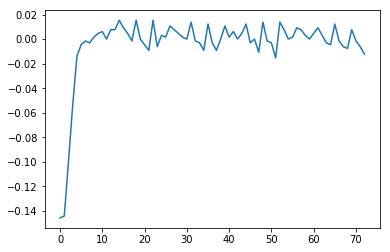

In [36]:
joint = [ row[0] for row in states]
plt.plot(joint)
plt.show()

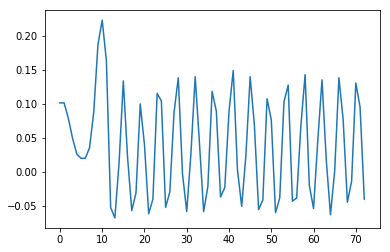

In [37]:
joint = [ row[1] for row in states]
plt.plot(joint)
plt.show()

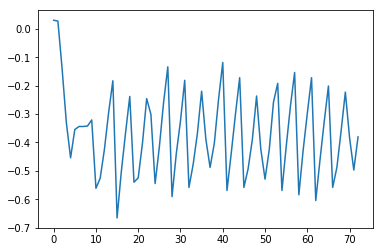

In [39]:
joint = [ row[2] for row in states]
plt.plot(joint)
plt.show()

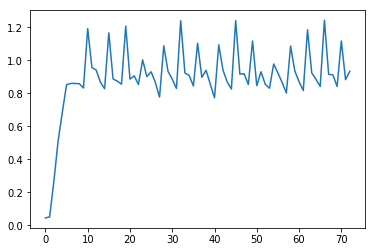

In [40]:
joint = [ row[3] for row in states]
plt.plot(joint)
plt.show()

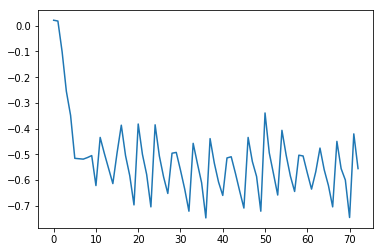

In [41]:
joint = [ row[4] for row in states]
plt.plot(joint)
plt.show()

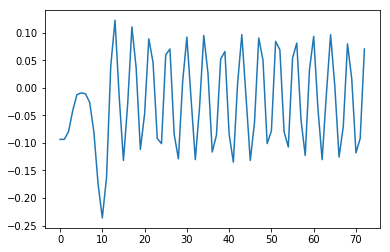

In [42]:
joint = [ row[5] for row in states]
plt.plot(joint)
plt.show()

In [6]:
motion_service = ALProxy("ALMotion" , ip, port)

In [8]:
angle = 1
motion_service.angleInterpolationWithSpeed("HeadYaw", angle, 0.2)

while True:
    print("start time: ", time.time())
    maxSpeedFraction  = 0.2 # Using 20% of maximum joint spee
    angle *= -1
    motion_service.angleInterpolationWithSpeed("HeadYaw", angle, maxSpeedFraction)
    print("end time: ", time.time())


('start time: ', 1683175558.34199)


KeyboardInterrupt: 